[markdown記法](https://qiita.com/tbpgr/items/989c6badefff69377da7)

[米国データサイエンティストがやさしく教えるデータサイエンスのためのPython講座](https://www.udemy.com/course/ds_for_python/learn/lecture/21511822#overview)

# Matplotlib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## plt.plot()
- plt.plot(x, y)
- plt.plot('column1', 'column2', data=df)

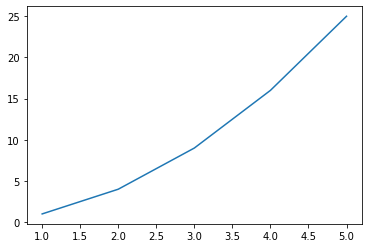

In [6]:
x = [1, 2, 3, 4, 5]
# y = [1, 4, 9, 16, 25]
y = np.array(x) ** 2
plt.plot(x,y)

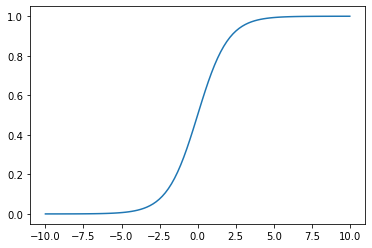

In [15]:
## sigmoid関数　0か1かを表現できる
x = np.linspace(-10, 10, 100)
z = 1 / (1 + np.exp(-x))
plt.plot(x, z)

<ipython-input-19-e1ced58834f9>:3: RuntimeWarning: Second argument 'b' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('a', 'b', data=df)


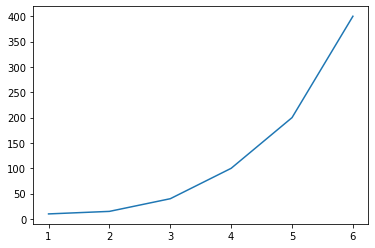

In [19]:
df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],
'b': [10, 15, 40, 100, 200, 400]})
plt.plot('a', 'b', data=df)

## 49.Matplotlibのstyle変更

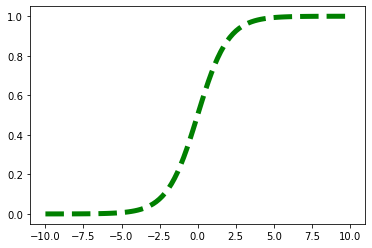

In [22]:
x = np.linspace(-10, 10, 100)
z = 1 / (1 + np.exp(-x))
plt.plot(x, z, 'g--', linewidth=5)

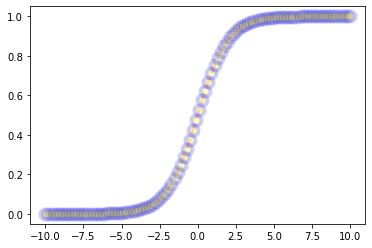

In [29]:
plt.plot(x, z,
        color='red',
        lw=3,
        ls='--',
        marker='o',
        markersize=10,
        markerfacecolor='yellow',
        markeredgecolor='blue',
        markeredgewidth=4,
        alpha=0.2)

### 付属情報をつける

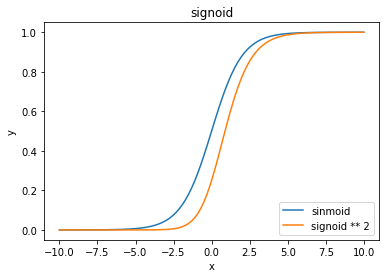

In [62]:
plt.plot(x, z, label='sinmoid')
plt.plot(x, z**2, label='signoid ** 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('signoid')
plt.legend(loc=4)

## 51.複数のplotを描画する
- plt.subplot()
- plt.figure()
- plt.subplots() - これが一番便利

### plt.subplot()

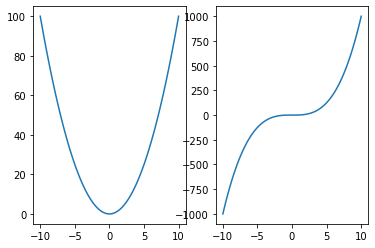

In [44]:
x = np.linspace(-10, 10, 100)
plt.subplot(1, 2, 1)
plt.plot(x, x**2)

plt.subplot(1, 2, 2)
plt.plot(x, x**3)

### plt.figure()
オブジェクト指向

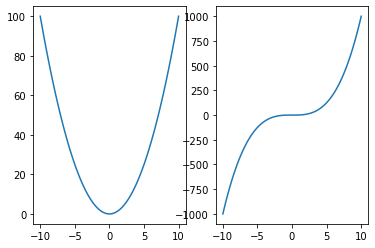

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x, x**2)
ax2.plot(x, x**3)

### plt.subplots()
**これが一番便利**

<ipython-input-61-7a3d33e6b0f3>:5: RuntimeWarning: invalid value encountered in log
  axes[1, 1].plot(x, np.log(x))


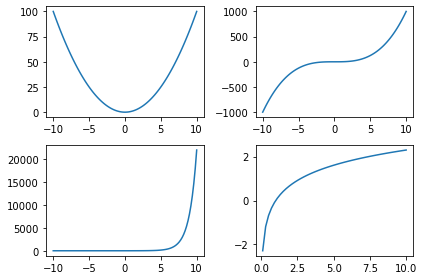

In [61]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(x, x**2)
axes[0, 1].plot(x, x**3)
axes[1, 0].plot(x, np.exp(x))
axes[1, 1].plot(x, np.log(x))
fig.tight_layout()

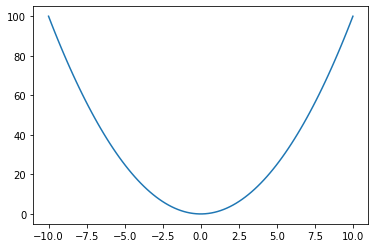

In [64]:
# 1行1列ならこれでOK
fig, axes = plt.subplots()
axes.plot(x, x**2)

(-11.0, 11.0, -1100.0, 1100.0)

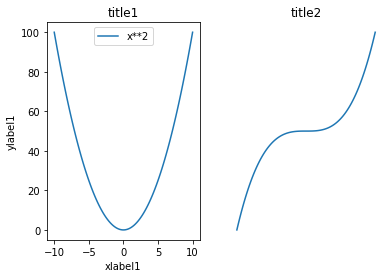

In [67]:
# 
fig, axes = plt.subplots(1, 2)
axes[0].plot(x, x**2, label='x**2')
axes[1].plot(x, x**3)
axes[0].set_xlabel('xlabel1')
axes[0].set_ylabel('ylabel1')
axes[0].set_title('title1')
axes[1].set_title('title2')
axes[0].legend()
axes[1].axis('off')

## 52.散布図
- plt.scatter()